In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('params.tsv', sep='\t')[['Teacher params', 'Student params']].dropna()
for col in df.columns:
    df[col] = df[col].apply(lambda string: float(string))
df

,Teacher params,Student params
0,65.0,65.0
1,53.7,53.7
2,1200.0,330.0
3,600.0,330.0
4,54000.0,615.0
...,...,...
81,133.0,133.0
82,65.0,65.0
83,65.0,18.0
84,220.0,65.0


In [3]:
df = df.groupby(['Teacher params', 'Student params']).size().reset_index().rename(columns={0:'num. works'})

In [4]:
df['ratio'] = df['Teacher params'] / df['Student params']

In [5]:
(df['ratio'] == 1).mean()

0.2549019607843137

[Text(0.5, 0, 'Student size (number of parameters, in M)'),
 Text(0, 0.5, 'Teacher size (number of parameters, in M)')]

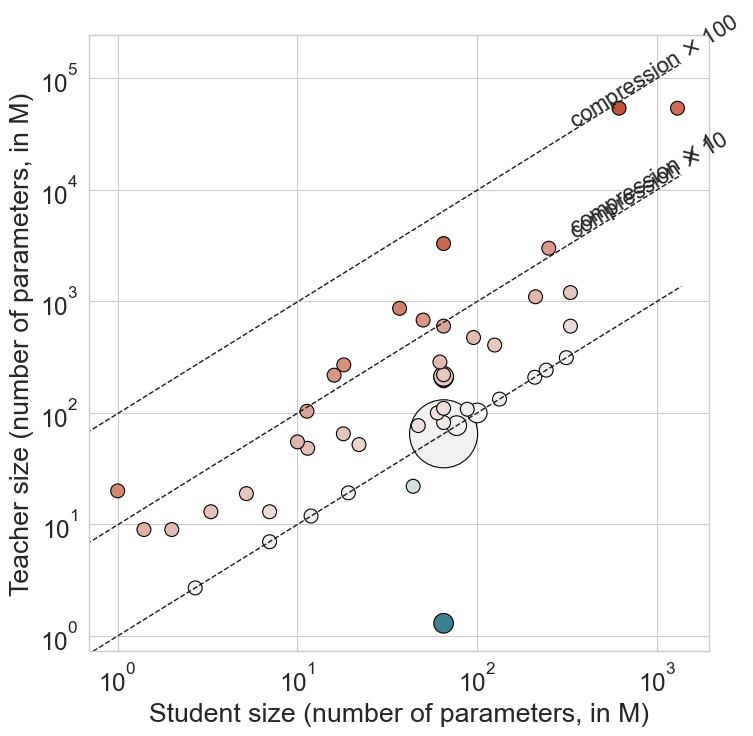

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors



# import numpy as np
xlims = ylims = (1, 10e5)


sns.set(style='whitegrid', rc={"grid.linewidth": 0.1, "figure.figsize": (8, 8)})
sns.set_context("paper", font_scale=2)


df['size'] = df['num. works']
df['logratio'] = np.log2(df.ratio)


vcenter = 0
vmin, vmax = df.logratio.min(), df.logratio.max()
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
cmap='Spectral'
cmap=sns.diverging_palette(220, 20, as_cmap=True)

#g = sns.scatterplot(data=df, y='Teacher params', x='Student params', hue='ratio', s=100, palette='flare', legend=False) 
g = sns.scatterplot(data=df, y='Teacher params', x='Student params', c=df.logratio, norm=normalize, cmap=cmap, size='size', sizes={sz: sz * 100 for sz in df['num. works'].unique()}, legend=False, edgecolor='black') 


def modify_plot(*args, **kwargs):
  """Must take x, y arrays as positional arguments and draw onto the “currently active” 
    matplotlib Axes. Also needs to accept kwargs called color and label.
    We are not using any of these args in this example so just capture them all.
  """
  # The "currently active" matplotlib Axis, unless they decide to pass it to us
  if "ax" in kwargs:
    # Not sure if this is ever used...
    ax = kwargs['ax']
  else:
    ax = plt.gca()
  # Make sure to ax.plot prior to ax.set, for some reason it doesn't work after
  # Oncematplotlib.__version__ >= 3.3 do the following (https://stackoverflow.com/a/73490857/658053)
  # ax.axline((0, 0), slope=1)
  # but the following is similar for earlier versions of matplotlib (https://stackoverflow.com/a/60950862/658053)
  xpoints = ypoints = ax.get_xlim()
  angle = 32
  ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
  plt.text(350, 400, 'compression $\\times$ 1', fontsize=16,
               rotation=angle, rotation_mode='anchor')

  ypoints_ = np.array(ypoints) * 10
  ax.plot(xpoints, ypoints_, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
  plt.text(350, 360 * 10, 'compression $\\times$ 10', fontsize=16,
               rotation=angle, rotation_mode='anchor')
  ypoints_ = np.array(ypoints) * 100
  ax.plot(xpoints, ypoints_, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
  plt.text(350, 360 * 100, 'compression $\\times$ 100', fontsize=16,
               rotation=angle, rotation_mode='anchor')

  ax.set(xscale="log", yscale="log")

modify_plot();
g.set(xlabel='Student size (number of parameters, in M)', ylabel='Teacher size (number of parameters, in M)')

In [9]:
g.get_figure().savefig('scatterplot-teacher-student-size_new.pdf', bbox_inches='tight')

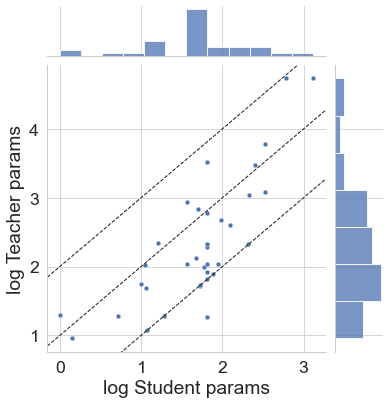

In [8]:
df['log Teacher params'] = np.log10(df['Teacher params'])
df['log Student params'] = np.log10(df['Student params'])


def modify_plot(*args, **kwargs):
  """Must take x, y arrays as positional arguments and draw onto the “currently active” 
    matplotlib Axes. Also needs to accept kwargs called color and label.
    We are not using any of these args in this example so just capture them all.
  """
  # The "currently active" matplotlib Axis, unless they decide to pass it to us
  if "ax" in kwargs:
    # Not sure if this is ever used...
    ax = kwargs['ax']
  else:
    ax = plt.gca()
  # Make sure to ax.plot prior to ax.set, for some reason it doesn't work after
  # Oncematplotlib.__version__ >= 3.3 do the following (https://stackoverflow.com/a/73490857/658053)
  # ax.axline((0, 0), slope=1)
  # but the following is similar for earlier versions of matplotlib (https://stackoverflow.com/a/60950862/658053)
  xpoints = ypoints = ax.get_xlim()
  angle = 36
  ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
  # plt.text(np.log10(350), np.log10(360), 'compression $\\times$ 1', fontsize=16,  rotation=angle, rotation_mode='anchor')

  ypoints_ = np.array(ypoints) + 1
  ax.plot(xpoints, ypoints_, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
  # plt.text(np.log10(350), np.log10(360 * 2), 'compression $\\times$ 10', fontsize=16, rotation=angle, rotation_mode='anchor')
  ypoints_ = np.array(ypoints) + 2 
  ax.plot(xpoints, ypoints_, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
  # plt.text(np.log10(350), np.log10(360 * 3), 'compression $\\times$ 100', fontsize=16, rotation=angle, rotation_mode='anchor')

  #ax.set(xscale="log", yscale="log")

g = sns.jointplot(data=df,  y='log Teacher params', x='log Student params', legend=False)
modify_plot(ax=g.ax_joint)

<AxesSubplot:xlabel='ratio', ylabel='Count'>

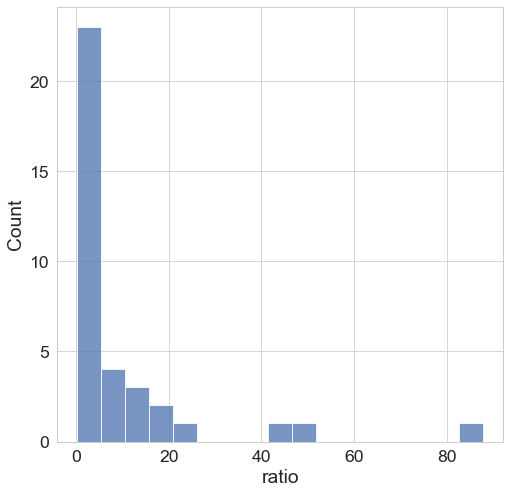

In [9]:
sns.histplot(x=df.ratio)